In [7]:
import numpy as np
import pandas as pd
import os

"""
This will load a csv file and return a pandas dataframe
@input: filepath:: string :: filepath of csv file
@input: names:: list :: column names list 
"""
def load_csv(filepath, names=None):
    filepath =  os.path.abspath(filepath)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath, sep="\s+", names=names, encoding='utf-8', header=None)
        return df
    
    return None

filepath = "data/gisette/gisette_train.data"
# Create a pandas dataframe using file csv data
df = load_csv(filepath)
# shows the first 5 rows in the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0


In [8]:
labelspath = "data/gisette/gisette_train.labels"
df_labels = load_csv(labelspath)
df_labels.head()

,0
0,1
1,-1
2,1
3,1
4,1


In [9]:
# Use sklearn to standardise (specifically: normalise) the data so that 
# the data has a normal distribution -- mean = 0; stdev = 1
from sklearn.preprocessing import StandardScaler
x = df.values
x = StandardScaler().fit_transform(x)
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_features = pd.DataFrame(x,columns=feat_cols)
normalised_features.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature4990,feature4991,feature4992,feature4993,feature4994,feature4995,feature4996,feature4997,feature4998,feature4999
0,1.541220,-0.123041,0.941497,-0.036904,-0.138874,-0.257925,-0.142175,1.560614,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,1.598069,3.553351,-0.241703,-0.667996,-0.137595,-0.416091,2.539524
1,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,1.560614,-0.055548,-0.460474,...,-0.530165,1.314338,-0.048717,1.598069,-0.316455,-0.241703,1.841290,-0.137595,-0.416091,-0.470436
2,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436
3,-0.389794,-0.123041,1.664288,-0.036904,-0.138874,-0.257925,-0.142175,0.862681,-0.055548,2.547359,...,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,1.038622,-0.137595,-0.416091,2.095532
4,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,0.681027,-0.055548,2.619723,...,2.161801,-0.402723,-0.048717,1.210707,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436


In [11]:
# Choose the first 2 principal components
from sklearn.decomposition import PCA

pca_gisette = PCA()
principalComponents_gisette = pca_gisette.fit_transform(x)
print('Explained variation per principal component: {}'.format(pca_gisette.explained_variance_ratio_))

principal_gisette_df = pd.DataFrame(data = principalComponents_gisette)
principal_gisette_df.head()

Explained variation per principal component: [2.88348839e-02 2.25895110e-02 1.65859770e-02 ... 8.28660768e-35
 7.65059676e-35 2.55172955e-35]


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,27.930770,6.382353,20.431165,14.310345,26.924044,-5.494685,-17.571434,5.456262,-11.604153,-1.699578,...,-2.174517e-16,5.442369e-16,1.145757e-15,-5.291304e-16,-9.014975e-16,5.139009e-16,-2.530828e-17,9.763998e-16,5.696124e-16,-2.863141e-16
1,18.516409,-9.880576,-9.768554,-6.675411,-3.584477,1.597613,8.614237,8.958009,-0.514346,-8.596351,...,-1.717545e-15,4.366647e-16,-7.907528e-16,1.525743e-16,5.029136e-16,9.734870e-17,-7.128166e-16,6.880429e-16,6.735072e-17,4.369839e-16
2,10.245831,-13.196370,-10.956984,5.332120,0.218673,-3.320313,-8.508659,3.516458,2.679547,5.311724,...,1.350534e-15,7.106839e-16,2.867601e-16,-1.876517e-15,9.768512e-16,4.639165e-16,-1.524231e-15,-3.917601e-16,-3.378932e-16,-5.671281e-17
3,11.003066,-3.281594,4.379723,2.541200,-12.704066,-2.430469,-17.788730,20.524637,-13.005926,4.692608,...,1.647969e-16,-3.068803e-16,-4.516430e-16,4.590217e-16,-1.283044e-16,-5.114080e-16,-5.622022e-16,9.145925e-16,1.185268e-16,-2.289951e-16
4,-13.678304,-3.768969,-1.471030,-1.570656,0.002292,-0.130488,0.910008,-5.966396,-2.595913,-0.807536,...,1.551433e-16,-6.024497e-16,9.623984e-16,-1.149979e-15,-6.121155e-17,1.356458e-15,6.252850e-16,8.979385e-17,5.019119e-16,-2.113454e-16


In [13]:
# How many principal components do we need to explain the variance in data?
pca = PCA().fit(x)

evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))
# FYI: We have to go to 6 significant digits to explain the last PC.

 0: 0.0288
 1: 0.0226
 2: 0.0166
 3: 0.0162
 4: 0.0124
 5: 0.0114
 6: 0.0102
 7: 0.0088
 8: 0.0072
 9: 0.0069
10: 0.0065
11: 0.0056
12: 0.0052
13: 0.0049
14: 0.0047
15: 0.0044
16: 0.0040
17: 0.0039
18: 0.0037
19: 0.0036
20: 0.0035
21: 0.0033
22: 0.0033
23: 0.0032
24: 0.0029
25: 0.0029
26: 0.0028
27: 0.0027
28: 0.0027
29: 0.0026
30: 0.0025
31: 0.0024
32: 0.0024
33: 0.0023
34: 0.0022
35: 0.0022
36: 0.0021
37: 0.0021
38: 0.0021
39: 0.0020
40: 0.0020
41: 0.0019
42: 0.0019
43: 0.0019
44: 0.0019
45: 0.0018
46: 0.0018
47: 0.0017
48: 0.0017
49: 0.0017
50: 0.0016
51: 0.0016
52: 0.0016
53: 0.0016
54: 0.0016
55: 0.0015
56: 0.0015
57: 0.0015
58: 0.0014
59: 0.0014
60: 0.0014
61: 0.0014
62: 0.0014
63: 0.0014
64: 0.0013
65: 0.0013
66: 0.0013
67: 0.0013
68: 0.0013
69: 0.0013
70: 0.0013
71: 0.0013
72: 0.0012
73: 0.0012
74: 0.0012
75: 0.0012
76: 0.0012
77: 0.0012
78: 0.0011
79: 0.0011
80: 0.0011
81: 0.0011
82: 0.0011
83: 0.0011
84: 0.0011
85: 0.0011
86: 0.0011
87: 0.0010
88: 0.0010
89: 0.0010
90: 0.0010

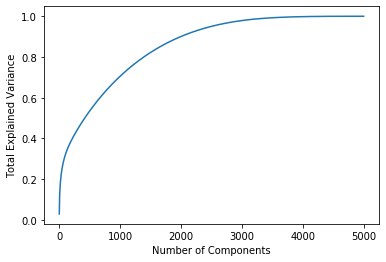

In [15]:
import matplotlib.pyplot as plt
# Graph it...
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');